# 5th CHECKPONT 

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd 
df=pd.read_csv("titanic-passengers (1).csv",sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [67]:
df.isnull().sum().sum()

866

In [68]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
df['Age'].mean()

29.69911764705882

In [72]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [74]:
print(df['Age'].isnull().sum())

0


In [75]:
print(df["Cabin"].value_counts())
df["Cabin"].fillna('G6', inplace=True)
print(df.isnull().sum())

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64


In [76]:
print(df["Embarked"].value_counts())
df["Embarked"].fillna('S', inplace=True)
df["Embarked"].isnull().sum()

S    644
C    168
Q     77
Name: Embarked, dtype: int64


0

In [77]:
df.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.091566,0.159651,0.216225,1.000000


In [78]:
df1 = df.drop(["PassengerId","SibSp","Parch","Ticket",], axis=1)
df1

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,13.0000,G6,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,7.6500,F G73,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.000000,7.8542,G6,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,21.0750,G6,S
4,No,1,"Davidson, Mr. Thornton",male,31.000000,52.0000,B71,S
...,...,...,...,...,...,...,...,...
886,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,30.0708,G6,C
887,No,3,"Sirayanian, Mr. Orsen",male,22.000000,7.2292,G6,C
888,No,3,"Cacic, Miss. Marija",female,30.000000,8.6625,G6,S
889,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,7.8958,G6,S


In [79]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#preparing data for logistic regression
df1["Survived"]=df1["Survived"].map({"Yes": 1, "No": 0})   #convert admitted variable into numerical
df1.head()


,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,13.0000,G6,S
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,7.6500,F G73,S
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,7.8542,G6,S
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,21.0750,G6,S
4,0,1,"Davidson, Mr. Thornton",male,31.0,52.0000,B71,S


In [93]:
#features extraction
x = df1[['Pclass', 'Age']]
y = df1['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=80)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))


Accuracy=0.74


<AxesSubplot:xlabel='Age', ylabel='Survived'>

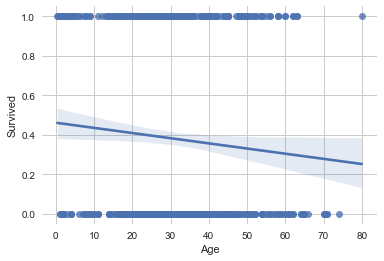

In [83]:
sns.regplot(x='Age',y='Survived',data=df1)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

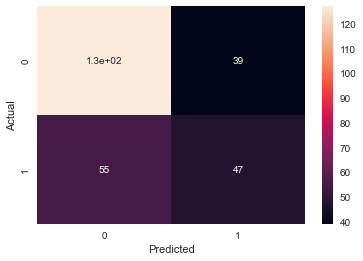

In [84]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       146
           1       0.67      0.48      0.56        77

    accuracy                           0.74       223
   macro avg       0.72      0.68      0.69       223
weighted avg       0.73      0.74      0.73       223



In [95]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

In [99]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [100]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.7334549012631204 0.6720334460060486


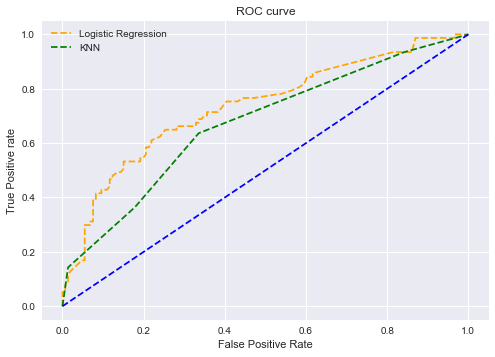

In [101]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();